In [1]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import os,sys
#os.getcwd()
# help(os.chdir)
#os.chdir(r"")
#os.getcwd()

In [2]:
mat= pd.read_csv("./pbmc_nmf_filt.csv",index_col=0).T

In [3]:
mat

,ISG15,CPSF3L,MRPL20,ATAD3C,C1orf86,RER1,RP3-395M20.9,LRRC47,GPR153,TNFRSF25,...,MX1,AP001046.6,SIK1,C21orf33,ICOSLG,SUMO3,SLC19A1,S100B,MT-CO2,MT-ND6
AAACATACAACCAC-1,0.000000,0.000000,1.802487,0.0,0.0,0.000000,0.0,0.000000,0.0,5.004436,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.188205,0.0
AAACATTGAGCTAC-1,0.000000,0.000000,0.000000,0.0,0.0,1.328302,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,1.956422,0.0,0.000000,0.0,0.0,1.488457,0.0
AAACATTGATCAGC-1,0.942034,0.000000,1.575363,0.0,0.0,1.708290,0.0,3.945237,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.632980,0.0
AAACCGTGCTTCCG-1,2.344511,0.000000,0.000000,0.0,0.0,1.871554,0.0,0.000000,0.0,0.000000,...,1.816332,0.0,0.0,2.756565,0.0,1.921484,0.0,0.0,1.051606,0.0
AAACCGTGTATGCG-1,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCGAACTCTCAT-1,2.454386,2.844189,1.497049,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,2.631455,0.0,0.0,0.000000,0.0,1.666676,0.0,0.0,0.802825,0.0
TTTCTACTGAGGCA-1,0.897475,2.851405,0.000000,0.0,0.0,1.627486,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.432086,0.0
TTTCTACTTCCTCG-1,0.000000,0.000000,0.000000,0.0,0.0,2.314429,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,3.408863,0.0,2.376173,0.0,0.0,1.017932,0.0
TTTGCATGAGAGGC-1,0.000000,0.000000,2.620344,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0


In [4]:
celltype=pd.read_csv("./celltype2.csv",index_col=0)
celltype

,x
1,Memory CD4 T
2,B
3,Memory CD4 T
4,CD14+ Mono
5,NK
...,...
2634,CD14+ Mono
2635,B
2636,B
2637,B


In [5]:
celltype["x"].value_counts()

Naive CD4 T     711
CD14+ Mono      480
Memory CD4 T    472
B               344
CD8 T           279
FCGR3A+ Mono    162
NK              144
DC               32
Platelet         14
Name: x, dtype: int64

In [6]:
celltype[celltype["x"].isin(["Memory CD4 T","Naive CD4 T"])]="CD4 T"

In [7]:
celltype["x"].value_counts()

CD4 T           1183
CD14+ Mono       480
B                344
CD8 T            279
FCGR3A+ Mono     162
NK               144
DC                32
Platelet          14
Name: x, dtype: int64

In [8]:
#help(plt.title)

Text(0, 0.5, 'umap2')

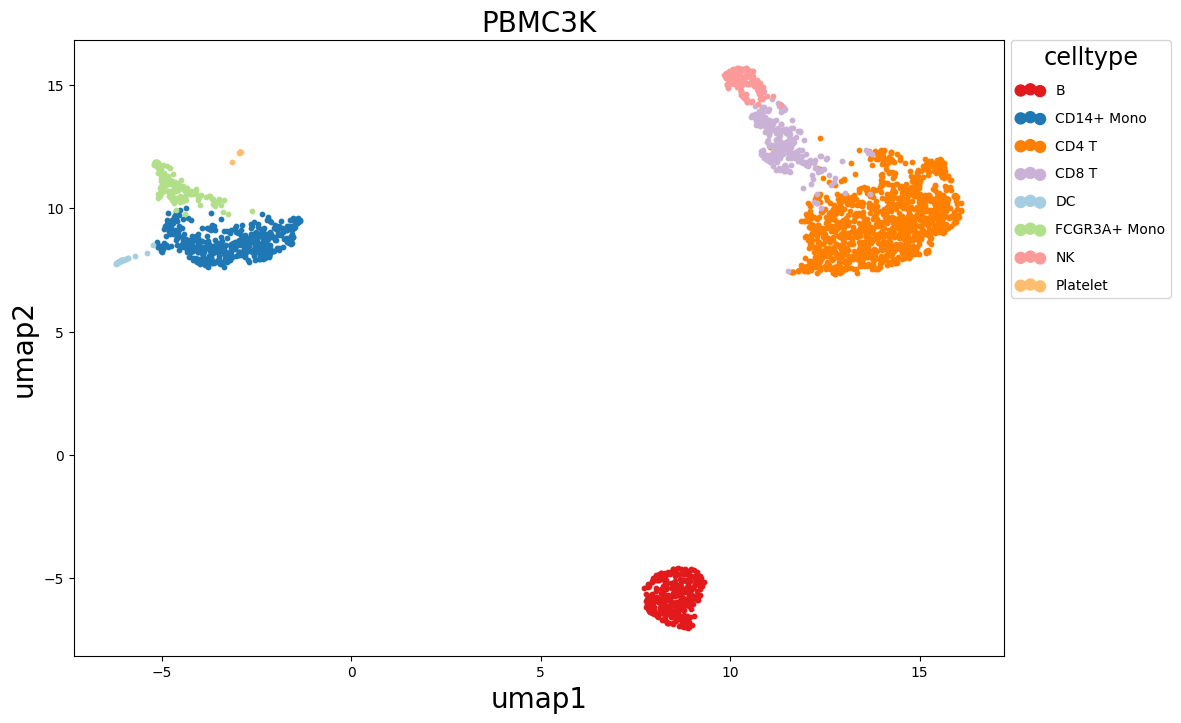

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
umap_embedding=pd.read_csv("./singlecell-NMF_hvg2000_umap.csv",index_col=0)
umap_data=umap_embedding.values
plt.figure(figsize=(12,8))
plt.title('PBMC3K' ,fontsize=20)
#celltype2=pd.read_csv("./celltype2.csv",index_col=0)
target_names=list(celltype["x"].astype('category').cat.categories)
target=celltype["x"].astype('category').values.codes
#colors=['#800000','#FF0000','#C71585','#FF00FF','#FFC0CB','#4B0082','#8B008B','#6A5ACD','#8B4513']#,'#FF8C00','#FF6347','#20B2AA']
colors=['#E31A1C','#1F78B4','#FF7F00','#CAB2D6','#A6CEE3','#B2DF8A','#FB9A99','#FDBF6F','#33A02C',]
for color,i,target_name in zip(colors,np.arange(9),target_names):
    plt.scatter(umap_data[target==i,0], umap_data[target==i,1],color=color, s=10,label=target_name)
#plt.legend(loc='best',scatterpoints=1,fontsize='medium')#,scatteryoffsets=1
plt.legend(loc='best',scatterpoints=3,labelspacing=1,markerscale=2.5,fontsize='medium',bbox_to_anchor=(1.18,1.0),borderaxespad=0.,title='celltype',title_fontsize='xx-large')#,scatteryoffsets=1
plt.xlabel("umap1",fontsize=20)
plt.ylabel("umap2",fontsize=20)

In [14]:
mat2= pd.read_csv("./pbmc_nmf_filt_T_all.csv",index_col=0)
mat2

,AL627309.1,AP006222.2,RP11-206L10.2,RP11-206L10.9,LINC00115,NOC2L,KLHL17,PLEKHN1,RP11-54O7.17,HES4,...,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AC145212.1,AL592183.1,AL354822.1,PNRC2.1,SRSF10.1
AAACATACAACCAC-1,0,0,0,0,0.0,0.0,0.0,0,0,0.0,...,0.000000,1.259619,1.133804,0.0,1.024205,0.0,0.000000,0,0.0,0.0
AAACATTGAGCTAC-1,0,0,0,0,0.0,0.0,0.0,0,0,0.0,...,0.000000,1.420455,0.770516,0.0,1.019707,0.0,1.800763,0,0.0,0.0
AAACATTGATCAGC-1,0,0,0,0,0.0,0.0,0.0,0,0,0.0,...,0.000000,0.791778,1.382999,0.0,0.936212,0.0,0.000000,0,0.0,0.0
AAACCGTGCTTCCG-1,0,0,0,0,0.0,0.0,0.0,0,0,0.0,...,2.366133,0.845787,1.489636,0.0,0.768545,0.0,0.000000,0,0.0,0.0
AAACCGTGTATGCG-1,0,0,0,0,0.0,0.0,0.0,0,0,0.0,...,0.000000,0.000000,2.123464,0.0,0.864021,0.0,0.000000,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCGAACTCTCAT-1,0,0,0,0,0.0,0.0,0.0,0,0,0.0,...,0.000000,0.456896,0.000000,0.0,0.485837,0.0,0.000000,0,0.0,0.0
TTTCTACTGAGGCA-1,0,0,0,0,0.0,0.0,0.0,0,0,0.0,...,2.057566,0.645067,0.944066,0.0,0.906512,0.0,0.000000,0,0.0,0.0
TTTCTACTTCCTCG-1,0,0,0,0,0.0,0.0,0.0,0,0,0.0,...,0.000000,1.261428,0.000000,0.0,1.147466,0.0,0.000000,0,0.0,0.0
TTTGCATGAGAGGC-1,0,0,0,0,0.0,0.0,0.0,0,0,0.0,...,3.592327,0.000000,0.000000,0.0,0.850380,0.0,0.000000,10,0.0,0.0


In [15]:
df=mat2.copy()

In [16]:
celltype2=pd.read_csv("./celltype2.csv",index_col=0)

In [17]:
celltype2["x"].values

array(['Memory CD4 T', 'B', 'Memory CD4 T', ..., 'B', 'B', 'Naive CD4 T'],
      dtype=object)

In [18]:
df['celltype']=celltype2["x"].values

In [19]:
df

,AL627309.1,AP006222.2,RP11-206L10.2,RP11-206L10.9,LINC00115,NOC2L,KLHL17,PLEKHN1,RP11-54O7.17,HES4,...,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AC145212.1,AL592183.1,AL354822.1,PNRC2.1,SRSF10.1,celltype
AAACATACAACCAC-1,0,0,0,0,0.0,0.0,0.0,0,0,0.0,...,1.259619,1.133804,0.0,1.024205,0.0,0.000000,0,0.0,0.0,Memory CD4 T
AAACATTGAGCTAC-1,0,0,0,0,0.0,0.0,0.0,0,0,0.0,...,1.420455,0.770516,0.0,1.019707,0.0,1.800763,0,0.0,0.0,B
AAACATTGATCAGC-1,0,0,0,0,0.0,0.0,0.0,0,0,0.0,...,0.791778,1.382999,0.0,0.936212,0.0,0.000000,0,0.0,0.0,Memory CD4 T
AAACCGTGCTTCCG-1,0,0,0,0,0.0,0.0,0.0,0,0,0.0,...,0.845787,1.489636,0.0,0.768545,0.0,0.000000,0,0.0,0.0,CD14+ Mono
AAACCGTGTATGCG-1,0,0,0,0,0.0,0.0,0.0,0,0,0.0,...,0.000000,2.123464,0.0,0.864021,0.0,0.000000,0,0.0,0.0,NK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCGAACTCTCAT-1,0,0,0,0,0.0,0.0,0.0,0,0,0.0,...,0.456896,0.000000,0.0,0.485837,0.0,0.000000,0,0.0,0.0,CD14+ Mono
TTTCTACTGAGGCA-1,0,0,0,0,0.0,0.0,0.0,0,0,0.0,...,0.645067,0.944066,0.0,0.906512,0.0,0.000000,0,0.0,0.0,B
TTTCTACTTCCTCG-1,0,0,0,0,0.0,0.0,0.0,0,0,0.0,...,1.261428,0.000000,0.0,1.147466,0.0,0.000000,0,0.0,0.0,B
TTTGCATGAGAGGC-1,0,0,0,0,0.0,0.0,0.0,0,0,0.0,...,0.000000,0.000000,0.0,0.850380,0.0,0.000000,10,0.0,0.0,B


In [20]:
df_cd4t=df[df["celltype"].isin(["Memory CD4 T","Naive CD4 T"])]

In [21]:
df_cd4t

,AL627309.1,AP006222.2,RP11-206L10.2,RP11-206L10.9,LINC00115,NOC2L,KLHL17,PLEKHN1,RP11-54O7.17,HES4,...,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AC145212.1,AL592183.1,AL354822.1,PNRC2.1,SRSF10.1,celltype
AAACATACAACCAC-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,...,1.259619,1.133804,0.000000,1.024205,0.0,0.000000,0,0.0,0.000000,Memory CD4 T
AAACATTGATCAGC-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,...,0.791778,1.382999,0.000000,0.936212,0.0,0.000000,0,0.0,0.000000,Memory CD4 T
AAACGCACTGGTAC-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,...,0.998775,0.000000,0.000000,0.965232,0.0,0.000000,0,0.0,0.000000,Memory CD4 T
AAACGCTGTAGCCA-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,...,0.946496,0.000000,0.000000,0.779404,0.0,0.000000,0,0.0,0.000000,Naive CD4 T
AAACTTGATCCAGA-1,0,0,0,0,0.0,3.109702,0.0,0,0,0.0,...,0.553612,0.000000,3.225857,0.588680,0.0,0.000000,0,0.0,0.000000,Naive CD4 T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTAGCTAGCTCA-1,0,0,0,0,0.0,3.029891,0.0,0,0,0.0,...,1.021649,1.773401,0.000000,0.783538,0.0,2.598201,0,0.0,0.000000,Memory CD4 T
TTTAGCTGATACCG-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,...,1.217102,1.062359,0.000000,0.885366,0.0,0.000000,0,0.0,0.000000,Naive CD4 T
TTTCACGAGGTTCA-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,...,1.089874,1.231558,0.000000,0.851653,0.0,0.000000,0,0.0,0.000000,Naive CD4 T
TTTCCAGAGGTGAG-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,...,0.577679,0.000000,0.000000,0.828512,0.0,0.000000,0,0.0,6.651276,Memory CD4 T


In [22]:
df_cd4t.iloc[:,0:-1]

,AL627309.1,AP006222.2,RP11-206L10.2,RP11-206L10.9,LINC00115,NOC2L,KLHL17,PLEKHN1,RP11-54O7.17,HES4,...,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AC145212.1,AL592183.1,AL354822.1,PNRC2.1,SRSF10.1
AAACATACAACCAC-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,...,0.000000,1.259619,1.133804,0.000000,1.024205,0.0,0.000000,0,0.0,0.000000
AAACATTGATCAGC-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,...,0.000000,0.791778,1.382999,0.000000,0.936212,0.0,0.000000,0,0.0,0.000000
AAACGCACTGGTAC-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,...,0.000000,0.998775,0.000000,0.000000,0.965232,0.0,0.000000,0,0.0,0.000000
AAACGCTGTAGCCA-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,...,0.000000,0.946496,0.000000,0.000000,0.779404,0.0,0.000000,0,0.0,0.000000
AAACTTGATCCAGA-1,0,0,0,0,0.0,3.109702,0.0,0,0,0.0,...,2.486804,0.553612,0.000000,3.225857,0.588680,0.0,0.000000,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTAGCTAGCTCA-1,0,0,0,0,0.0,3.029891,0.0,0,0,0.0,...,2.422979,1.021649,1.773401,0.000000,0.783538,0.0,2.598201,0,0.0,0.000000
TTTAGCTGATACCG-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,...,0.000000,1.217102,1.062359,0.000000,0.885366,0.0,0.000000,0,0.0,0.000000
TTTCACGAGGTTCA-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,...,2.684149,1.089874,1.231558,0.000000,0.851653,0.0,0.000000,0,0.0,0.000000
TTTCCAGAGGTGAG-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,...,0.000000,0.577679,0.000000,0.000000,0.828512,0.0,0.000000,0,0.0,6.651276


In [23]:
#!pip uninstall -y singlecell-NMF

In [24]:
#!pip install singlecell-NMF

In [25]:
df0=df_cd4t.iloc[:,0:-1]

In [26]:
df0

,AL627309.1,AP006222.2,RP11-206L10.2,RP11-206L10.9,LINC00115,NOC2L,KLHL17,PLEKHN1,RP11-54O7.17,HES4,...,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AC145212.1,AL592183.1,AL354822.1,PNRC2.1,SRSF10.1
AAACATACAACCAC-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,...,0.000000,1.259619,1.133804,0.000000,1.024205,0.0,0.000000,0,0.0,0.000000
AAACATTGATCAGC-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,...,0.000000,0.791778,1.382999,0.000000,0.936212,0.0,0.000000,0,0.0,0.000000
AAACGCACTGGTAC-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,...,0.000000,0.998775,0.000000,0.000000,0.965232,0.0,0.000000,0,0.0,0.000000
AAACGCTGTAGCCA-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,...,0.000000,0.946496,0.000000,0.000000,0.779404,0.0,0.000000,0,0.0,0.000000
AAACTTGATCCAGA-1,0,0,0,0,0.0,3.109702,0.0,0,0,0.0,...,2.486804,0.553612,0.000000,3.225857,0.588680,0.0,0.000000,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTAGCTAGCTCA-1,0,0,0,0,0.0,3.029891,0.0,0,0,0.0,...,2.422979,1.021649,1.773401,0.000000,0.783538,0.0,2.598201,0,0.0,0.000000
TTTAGCTGATACCG-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,...,0.000000,1.217102,1.062359,0.000000,0.885366,0.0,0.000000,0,0.0,0.000000
TTTCACGAGGTTCA-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,...,2.684149,1.089874,1.231558,0.000000,0.851653,0.0,0.000000,0,0.0,0.000000
TTTCCAGAGGTGAG-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,...,0.000000,0.577679,0.000000,0.000000,0.828512,0.0,0.000000,0,0.0,6.651276


dfscanpy= pd.read_csv("./scanpy与处理数据full.csv",index_col=0)
dfscanpy

dfscanpy1= pd.read_csv("./pbmc_cd4t_scanpy1.csv",index_col=0)
dfscanpy1

df.index & dfscanpy.index

df.index & dfscanpy1.index

In [27]:
df0.values

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        6.65127553],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [28]:
#from singlecell_NMF import nmf_cluster

In [29]:
#help(nmf_cluster)

In [30]:
#W,H=nmf_cluster(mat=df0,n_components=2)

In [31]:
#W,H=nmf_cluster(mat=df0,n_components=2,init = 'random')

In [32]:
def nmf_cluster(mat,n_components=9,init = 'random', algo='bpp',use_gpu=False):#
    
    #from sklearn.datasets import fetch_20newsgroups
    from time import time
    n_samples = mat.shape[0]
    n_features =mat.shape[1]
    #n_components = 12
    #n_top_words = 20
    #batch_size = 28
    #init = "nndsvda"

    #sp_mat=sp.csr_matrix(mat)
    

    # Fit the NMF model:frobenius
    print(
    "Fitting the NMF model (Frobenius norm) with tf-idf features, "
    "n_samples=%d and n_features=%d..." % (n_samples, n_features)
    )
    t0 = time()
    from nmf import run_nmf
    W,H,err = run_nmf(mat, n_components,use_gpu=use_gpu,beta_loss=2.0, init=init, algo=algo )#,verose=False,n_jobs
    #print(err)
    print("done in %0.3fs." % (time() - t0))
    #scale_smc_nmf.index
    return W,H

In [33]:
df0

,AL627309.1,AP006222.2,RP11-206L10.2,RP11-206L10.9,LINC00115,NOC2L,KLHL17,PLEKHN1,RP11-54O7.17,HES4,...,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AC145212.1,AL592183.1,AL354822.1,PNRC2.1,SRSF10.1
AAACATACAACCAC-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,...,0.000000,1.259619,1.133804,0.000000,1.024205,0.0,0.000000,0,0.0,0.000000
AAACATTGATCAGC-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,...,0.000000,0.791778,1.382999,0.000000,0.936212,0.0,0.000000,0,0.0,0.000000
AAACGCACTGGTAC-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,...,0.000000,0.998775,0.000000,0.000000,0.965232,0.0,0.000000,0,0.0,0.000000
AAACGCTGTAGCCA-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,...,0.000000,0.946496,0.000000,0.000000,0.779404,0.0,0.000000,0,0.0,0.000000
AAACTTGATCCAGA-1,0,0,0,0,0.0,3.109702,0.0,0,0,0.0,...,2.486804,0.553612,0.000000,3.225857,0.588680,0.0,0.000000,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTAGCTAGCTCA-1,0,0,0,0,0.0,3.029891,0.0,0,0,0.0,...,2.422979,1.021649,1.773401,0.000000,0.783538,0.0,2.598201,0,0.0,0.000000
TTTAGCTGATACCG-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,...,0.000000,1.217102,1.062359,0.000000,0.885366,0.0,0.000000,0,0.0,0.000000
TTTCACGAGGTTCA-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,...,2.684149,1.089874,1.231558,0.000000,0.851653,0.0,0.000000,0,0.0,0.000000
TTTCCAGAGGTGAG-1,0,0,0,0,0.0,0.000000,0.0,0,0,0.0,...,0.000000,0.577679,0.000000,0.000000,0.828512,0.0,0.000000,0,0.0,6.651276


In [34]:
np.min(df0.values)

0.0

In [35]:
import torch
import numpy as np
x_ts= torch.from_numpy(df0.values)
W,H=nmf_cluster(mat=x_ts,n_components=2,use_gpu=True,init = 'random', algo='bpp')#,init = 'nndsvda')##,init = 'random'


Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=1183 and n_features=13714...
Use GPU mode.
 niter=10, loss=3276.8677117027473.
 niter=20, loss=3276.682945449559.
    Converged after 20 iteration(s).
done in 2.375s.


In [36]:
#W,H=nmf_cluster(mat=df0.values,n_components=2,init = 'random', algo='bpp',use_gpu=False)#,init = 'nndsvda')##,init = 'random'

In [37]:
1.59/0.035


45.42857142857142

In [38]:
np.array(df0.columns)

array(['AL627309.1', 'AP006222.2', 'RP11-206L10.2', ..., 'AL354822.1',
       'PNRC2.1', 'SRSF10.1'], dtype=object)

In [39]:
H.shape

(2, 13714)

In [40]:
df0.columns

Index(['AL627309.1', 'AP006222.2', 'RP11-206L10.2', 'RP11-206L10.9',
       'LINC00115', 'NOC2L', 'KLHL17', 'PLEKHN1', 'RP11-54O7.17', 'HES4',
       ...
       'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6', 'MT-CYB', 'AC145212.1',
       'AL592183.1', 'AL354822.1', 'PNRC2.1', 'SRSF10.1'],
      dtype='object', length=13714)

In [41]:
feature_names = np.array(df0.columns)

In [42]:
#from singlecell_NMF import plot_top_genes

In [43]:
def plot_top_genes(H, feature_names, n_top_words, title,list):
    import matplotlib.pyplot as plt
    import scipy.sparse as sp
    fig, axes = plt.subplots(list[0],list[1], figsize=(40, 30), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(H):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Cluster {topic_idx}", fontdict={"fontsize": 80})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=80)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=80)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.30, hspace=0.3)
    plt.show()

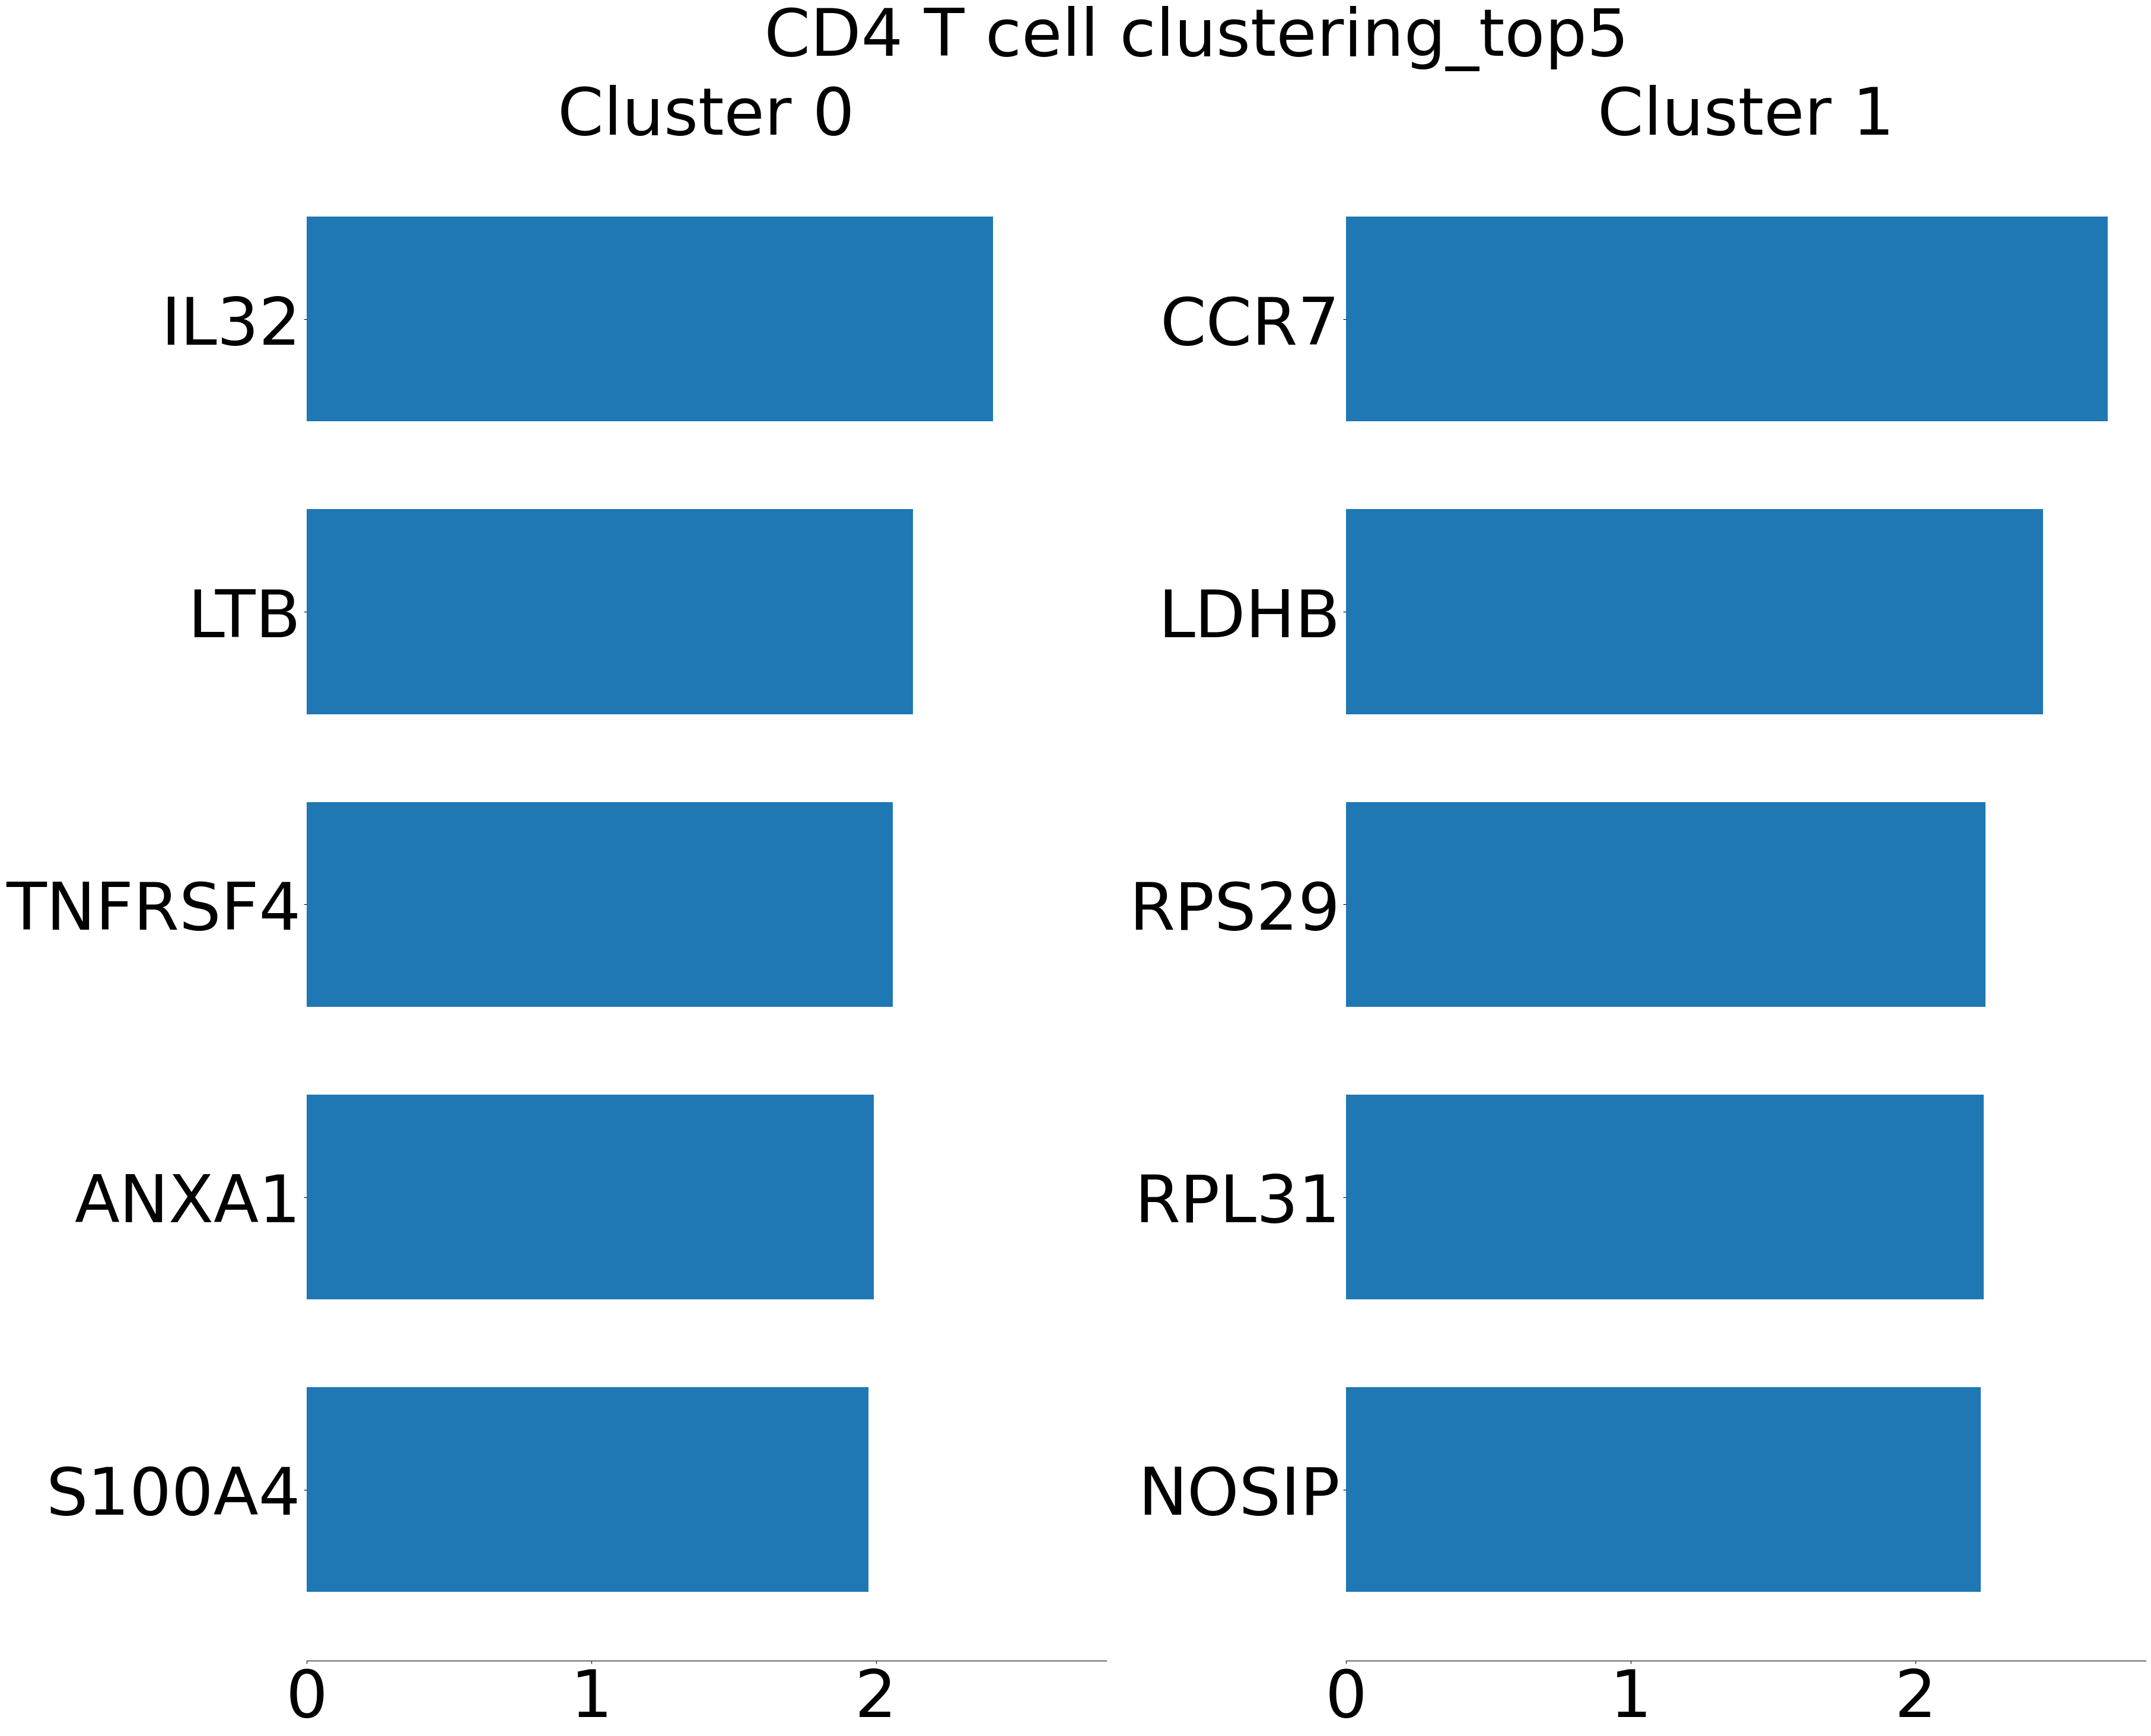

In [44]:
plot_top_genes( H, feature_names, 5, " CD4 T cell clustering_top5 ",[1,2])

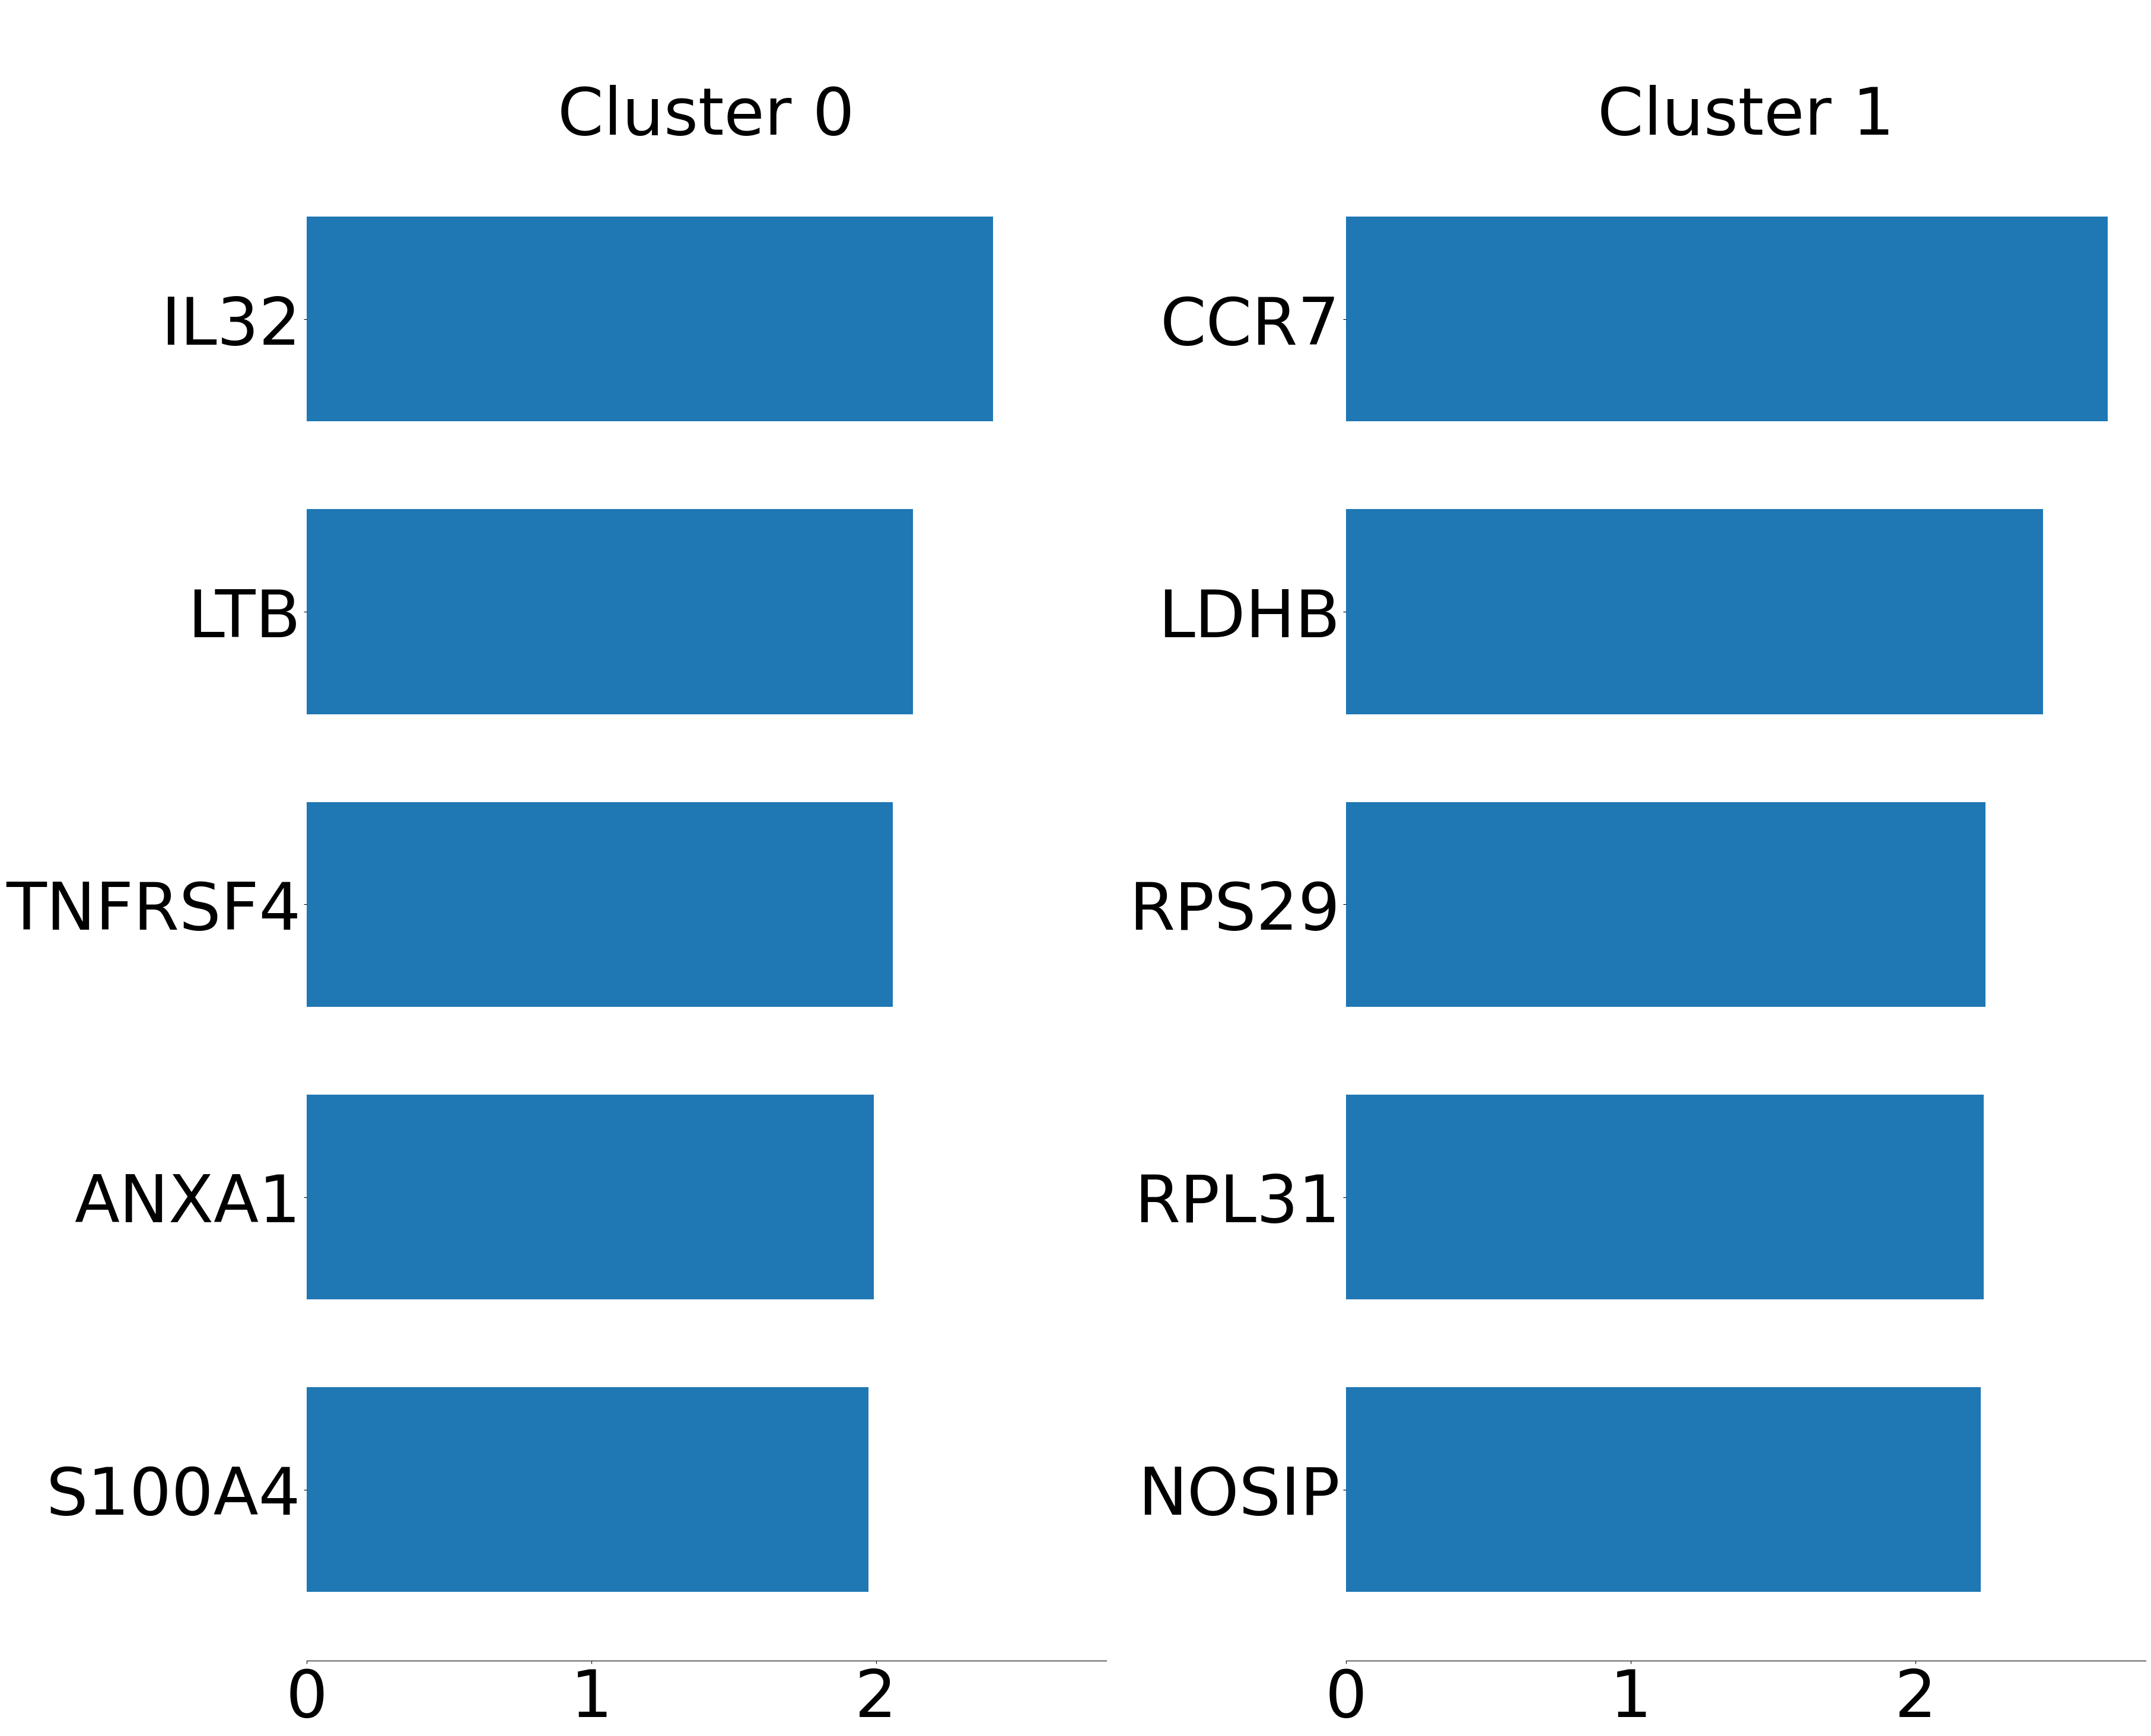

In [45]:
plot_top_genes( H, feature_names, 5, "  ",[1,2])

In [46]:
from singlecell_NMF import get_max_loading

In [47]:
NMF_labels=get_max_loading(W)

In [48]:
NMF_labels

array([0, 0, 0, ..., 1, 0, 1])

In [49]:
labels0=pd.DataFrame(NMF_labels,columns=['NMF_labels'],index=df0.index)
labels0

,NMF_labels
AAACATACAACCAC-1,0
AAACATTGATCAGC-1,0
AAACGCACTGGTAC-1,0
AAACGCTGTAGCCA-1,0
AAACTTGATCCAGA-1,1
...,...
TTGTAGCTAGCTCA-1,0
TTTAGCTGATACCG-1,1
TTTCACGAGGTTCA-1,1
TTTCCAGAGGTGAG-1,0


In [50]:
labels0.value_counts()

NMF_labels
1             688
0             495
dtype: int64

from sklearn.decomposition import PCA
reduced_data = PCA(n_components=10).fit_transform(df0.values)

import umap
umap_data = umap.UMAP(n_neighbors=10,n_components=2).fit_transform(reduced_data)

pd.DataFrame(umap_data,columns=['x','y'],index=df0.index)

In [51]:
#pd.DataFrame(umap_data,columns=['x','y'],index=df0.index).to_csv("bioinformatics_umap_well4seurat.csv")

In [52]:
#!pip uninstall -y umap

In [53]:
umap_embedding=pd.read_csv("./bioinformatics_umap_well4seurat.csv",index_col=0)
umap_embedding                           

,x,y
AAACATACAACCAC-1,6.600835,2.038866
AAACATTGATCAGC-1,2.695329,1.768189
AAACGCACTGGTAC-1,5.705618,1.637226
AAACGCTGTAGCCA-1,8.414455,4.019805
AAACTTGATCCAGA-1,4.309919,5.971140
...,...,...
TTGTAGCTAGCTCA-1,3.494887,2.034061
TTTAGCTGATACCG-1,4.960085,7.927847
TTTCACGAGGTTCA-1,6.176819,6.800618
TTTCCAGAGGTGAG-1,3.358009,3.086874


In [54]:
umap_data=umap_embedding.values

Text(0, 0.5, 'umap2')

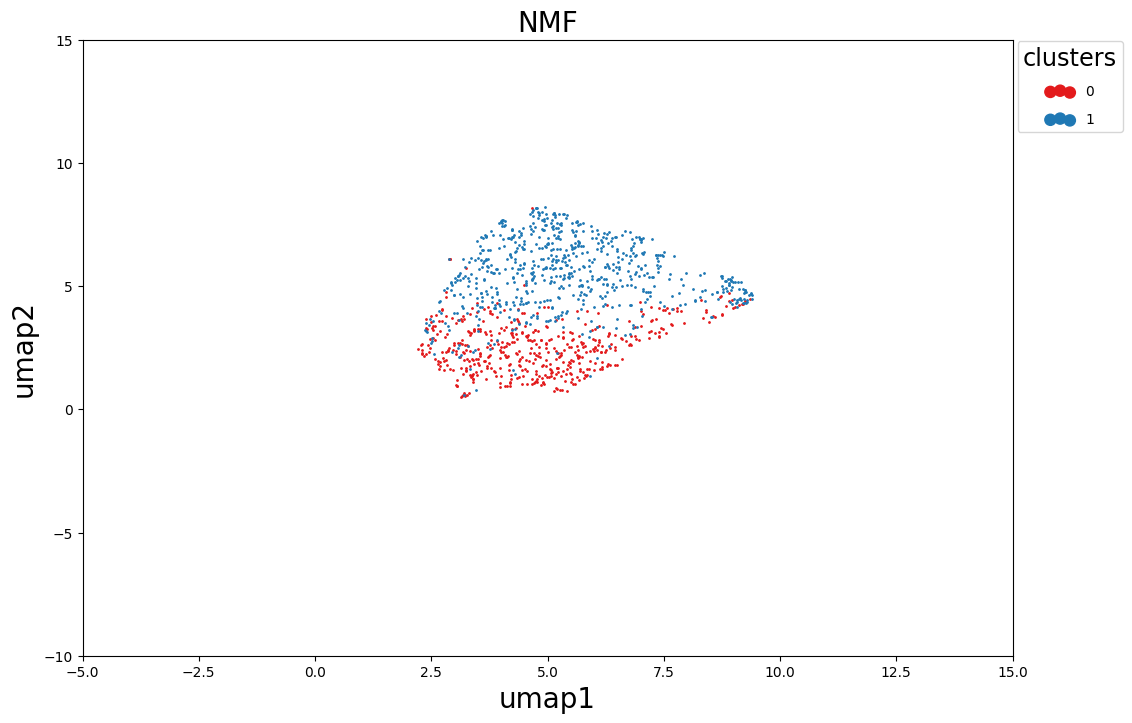

In [56]:
plt.figure(figsize=(12,8))
plt.title('NMF',fontsize=20)
#celltype2=pd.read_csv("./celltype2.csv",index_col=0)
#target_names=list(celltype2["x"].astype('category').cat.categories)
target_names=list(labels0["NMF_labels"].astype('category').cat.categories)
target=labels0["NMF_labels"].astype('category').values.codes
#colors=['#800000','#FF0000','#C71585','#FF00FF','#FFC0CB','#4B0082','#8B008B','#6A5ACD','#8B4513']#,'#FF8C00','#FF6347','#20B2AA']
colors=['#E31A1C','#1F78B4','#FF7F00','#CAB2D6','#A6CEE3','#B2DF8A','#FB9A99','#33A02C','#FDBF6F',]
for color,i,target_name in zip(colors,np.arange(2),target_names):
    plt.scatter(umap_data[target==i,0], umap_data[target==i,1],color=color, s=1,label=target_name)
#plt.legend(loc='best',scatterpoints=1,fontsize='medium')#,scatteryoffsets=1
plt.legend(loc='best',scatterpoints=3,labelspacing=1,markerscale=8,fontsize='medium',bbox_to_anchor=(1.12,1.0),borderaxespad=0.1,title='clusters',title_fontsize='xx-large')#,scatteryoffsets=1
plt.xlim(-5,15)
plt.ylim(-10,15)
plt.xlabel("umap1",fontsize=20)
plt.ylabel("umap2",fontsize=20)

Text(0, 0.5, 'umap2')

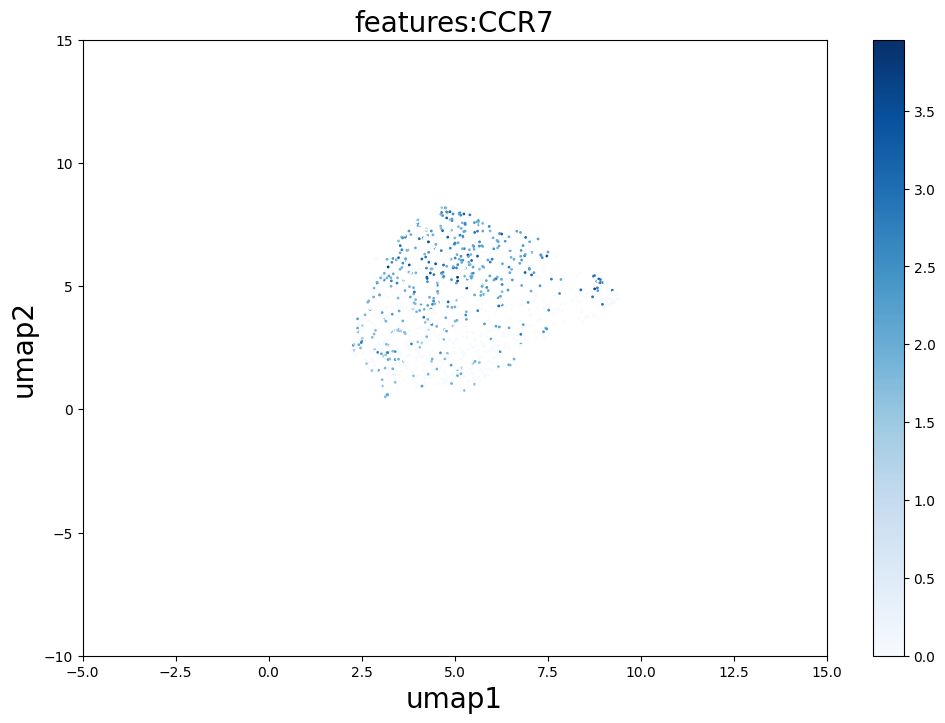

In [57]:
plt.figure(figsize=(12,8))
plt.title('features:CCR7',fontsize=20)
celltype2=pd.read_csv("./celltype2.csv",index_col=0)
#target_names=list(celltype2["x"].astype('category').cat.categories)
target_names=list(labels0["NMF_labels"].astype('category').cat.categories)
target=labels0["NMF_labels"].astype('category').values.codes
#colors=['#800000','#FF0000','#C71585','#FF00FF','#FFC0CB','#4B0082','#8B008B','#6A5ACD','#8B4513']#,'#FF8C00','#FF6347','#20B2AA']
#colors=['#E31A1C','#1F78B4','#FF7F00','#CAB2D6','#A6CEE3','#B2DF8A','#FB9A99','#33A02C','#FDBF6F',]

plt.scatter(umap_data[:,0], umap_data[:,1],c=df0["CCR7"].values, s=1,cmap='Blues',label="CCR7")#
#plt.legend(loc='best',scatterpoints=1,fontsize='medium')#,scatteryoffsets=1
#plt.legend(loc='best',scatterpoints=3,labelspacing=1,markerscale=2.5,fontsize='medium',bbox_to_anchor=(1.18,1.0),borderaxespad=0.,title='features',title_fontsize='xx-large')#,scatteryoffsets=1
plt.colorbar()
plt.xlim(-5,15)
plt.ylim(-10,15)
plt.xlabel("umap1",fontsize=20)
plt.ylabel("umap2",fontsize=20)

Text(0, 0.5, 'umap2')

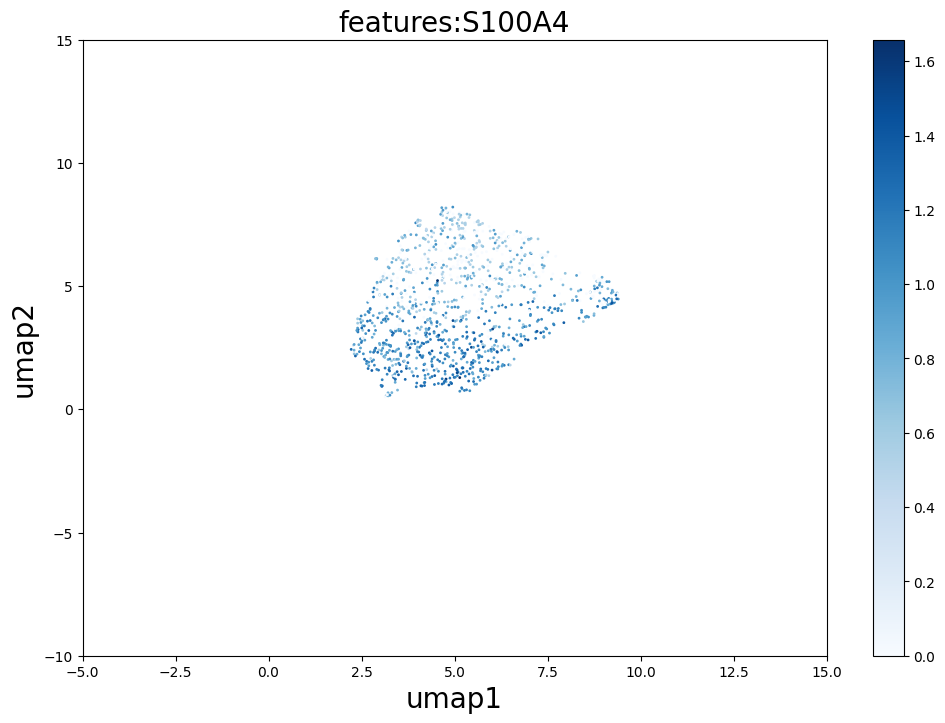

In [58]:
plt.figure(figsize=(12,8))
plt.title('features:S100A4',fontsize=20)
celltype2=pd.read_csv("./celltype2.csv",index_col=0)
#target_names=list(celltype2["x"].astype('category').cat.categories)
target_names=list(labels0["NMF_labels"].astype('category').cat.categories)
target=labels0["NMF_labels"].astype('category').values.codes
#colors=['#800000','#FF0000','#C71585','#FF00FF','#FFC0CB','#4B0082','#8B008B','#6A5ACD','#8B4513']#,'#FF8C00','#FF6347','#20B2AA']
#colors=['#E31A1C','#1F78B4','#FF7F00','#CAB2D6','#A6CEE3','#B2DF8A','#FB9A99','#33A02C','#FDBF6F',]

plt.scatter(umap_data[:,0], umap_data[:,1],c=df0["S100A4"].values, s=1,cmap='Blues',label="S100A4")#target_name
#plt.legend(loc='best',scatterpoints=1,fontsize='medium')#,scatteryoffsets=1
#plt.legend(loc='best',scatterpoints=3,labelspacing=1,markerscale=2.5,fontsize='medium',bbox_to_anchor=(1.18,1.0),borderaxespad=0.,title='features',title_fontsize='xx-large')#,scatteryoffsets=1
plt.colorbar()
plt.xlim(-5,15)
plt.ylim(-10,15)
plt.xlabel("umap1",fontsize=20)
plt.ylabel("umap2",fontsize=20)

In [ ]:
def get_top_genes(H, feature_names, n_top_words):
    import matplotlib.pyplot as plt
    import scipy.sparse as sp
    mat=[]
    for topic_idx, topic in enumerate(H):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        #print(top_features)
        #print("----------------")
        #print(weights)
        mat.append(top_features)
    #print(mat)
    return pd.DataFrame(np.array(mat).T)
def get_topn(H, feature_names,n=10,n_components=9):
    sort_gene=get_top_genes(H, feature_names, n)
    sort_gene
    lst=[]
    for i in np.arange(n_components):
        genes=sort_gene.iloc[:,i].values.tolist()
        lst.extend(genes)
    return lst
    

In [ ]:
get_top_genes(H, feature_names, 5)

In [ ]:
mat01=df0

In [ ]:
mat01['NMF_labels']=labels0['NMF_labels'].values

In [ ]:
mat01

In [ ]:
mat0=df0.sort_values(by="NMF_labels",ascending=True)
mat00=mat0.iloc[:,0:-1].T
mat000=pd.DataFrame(mat00.values,index=mat00.index,columns=mat0['NMF_labels'])
mat000

In [ ]:
genenames=get_topn(H, feature_names,n=5,n_components=2)
genenames

In [ ]:
mat000.loc[genenames]

In [ ]:
import seaborn as sns
plt.figure(figsize=(40,20))
sns.heatmap(mat000.loc[genenames],cmap="Blues")

In [ ]:
import seaborn as sns
plt.figure(figsize=(30,20))
sns.heatmap(mat000.loc[genenames],cmap="Reds")

In [59]:
#louvain聚类

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [61]:
umap_data=pd.read_csv("bioinformatics_umap_well4seurat.csv",index_col=0).values
umap_data

array([[6.6008353, 2.0388663],
       [2.6953287, 1.7681888],
       [5.7056184, 1.6372259],
       ...,
       [6.176819 , 6.800618 ],
       [3.3580093, 3.0868745],
       [4.400716 , 5.866768 ]])

In [62]:
labels0=pd.read_csv('cd4tlouvainpc10label.csv',index_col=0)
labels0

,louvain_labels
AAACATACAACCAC-1,0
AAACATTGATCAGC-1,0
AAACGCACTGGTAC-1,0
AAACGCTGTAGCCA-1,1
AAACTTGATCCAGA-1,0
...,...
TTGTAGCTAGCTCA-1,0
TTTAGCTGATACCG-1,0
TTTCACGAGGTTCA-1,0
TTTCCAGAGGTGAG-1,0


In [63]:
labels0['louvain_labels'].values

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
lst=[]
for i in list(labels0['louvain_labels'].values):
    print(i)
    if i==0:
        a=1
        lst.append(a)
    else:
        b=0
        lst.append(b)
     

0
0
0
1
0
0
1
1
0
1
1
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
1
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
1
0
0
0
1
1
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [65]:
lst

[1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [66]:
labels=pd.DataFrame(lst,columns=['louvain_labels'],index=labels0.index)
labels

,louvain_labels
AAACATACAACCAC-1,1
AAACATTGATCAGC-1,1
AAACGCACTGGTAC-1,1
AAACGCTGTAGCCA-1,0
AAACTTGATCCAGA-1,1
...,...
TTGTAGCTAGCTCA-1,1
TTTAGCTGATACCG-1,1
TTTCACGAGGTTCA-1,1
TTTCCAGAGGTGAG-1,1


Text(0, 0.5, 'umap2')

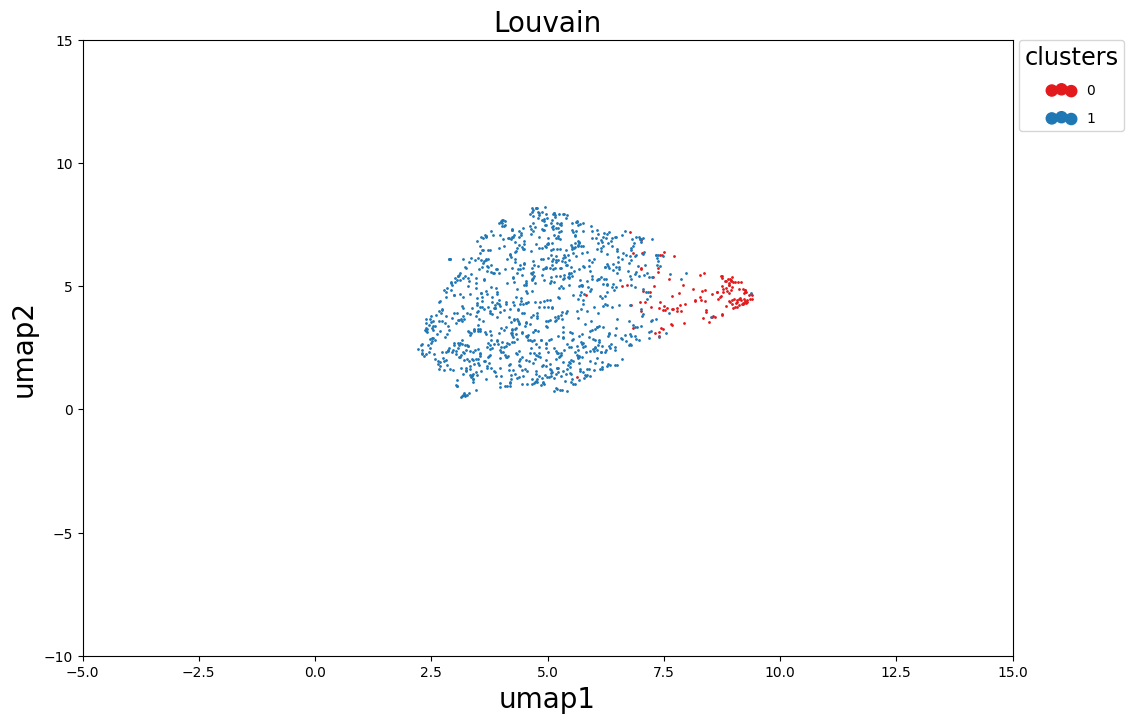

In [67]:
plt.figure(figsize=(12,8))
plt.title('Louvain',fontsize=20)
#celltype2=pd.read_csv("./celltype2.csv",index_col=0)
#target_names=list(celltype2["x"].astype('category').cat.categories)
target_names=list(labels["louvain_labels"].astype('category').cat.categories)
target=labels["louvain_labels"].astype('category').values.codes
#colors=['#800000','#FF0000','#C71585','#FF00FF','#FFC0CB','#4B0082','#8B008B','#6A5ACD','#8B4513']#,'#FF8C00','#FF6347','#20B2AA']
colors=['#E31A1C','#1F78B4','#FF7F00','#CAB2D6','#A6CEE3','#B2DF8A','#FB9A99','#33A02C','#FDBF6F',]
for color,i,target_name in zip(colors,np.arange(2),target_names):
    plt.scatter(umap_data[target==i,0], umap_data[target==i,1],color=color, s=1,label=target_name)
#plt.legend(loc='best',scatterpoints=1,fontsize='medium')#,scatteryoffsets=1
plt.legend(loc='best',scatterpoints=3,labelspacing=1,markerscale=8,fontsize='medium',bbox_to_anchor=(1.12,1.0),borderaxespad=0.,title='clusters',title_fontsize='xx-large')#,scatteryoffsets=1
plt.xlim(-5,15)
plt.ylim(-10,15)
plt.xlabel("umap1",fontsize=20)
plt.ylabel("umap2",fontsize=20)

In [68]:

from sklearn.decomposition import PCA
PCA_data = PCA(n_components=40).fit_transform(df0.values)
from sklearn.neighbors import kneighbors_graph
A = kneighbors_graph(PCA_data, 10, mode='connectivity', include_self=False)
A.toarray().shape

(1183, 1183)

In [69]:
A.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
np.max(A.toarray())

In [ ]:
from sknetwork.clustering import Louvain, get_modularity
louvain = Louvain(resolution=0.7)
labels = louvain.fit_transform(A)
labels


In [ ]:
np.max(labels)

In [ ]:
#!pip install -U umap-learn

In [ ]:
import umap 

In [ ]:
mat.values

In [ ]:
from sklearn.decomposition import PCA
reduced_data = PCA(n_components=25).fit_transform(mat.values)


In [ ]:
import umap
umap_data = umap.UMAP(n_neighbors=20,n_components=2).fit_transform(reduced_data)#

In [ ]:
umap_data

In [ ]:
umap_embedding=pd.DataFrame(umap_data,index=df.index)
umap_embedding

In [ ]:
plt.figure(figsize=(12,8))
plt.title('UMAP')
#celltype2=pd.read_csv("./celltype2.csv",index_col=0)
target_names=list(celltype2["x"].astype('category').cat.categories)
target=celltype2["x"].astype('category').values.codes
#colors=['#800000','#FF0000','#C71585','#FF00FF','#FFC0CB','#4B0082','#8B008B','#6A5ACD','#8B4513']#,'#FF8C00','#FF6347','#20B2AA']
colors=['#E31A1C','#1F78B4','#FF7F00','#CAB2D6','#A6CEE3','#B2DF8A','#FB9A99','#33A02C','#FDBF6F',]
for color,i,target_name in zip(colors,np.arange(9),target_names):
    plt.scatter(umap_data[target==i,0], umap_data[target==i,1],color=color, s=5,label=target_name)
#plt.legend(loc='best',scatterpoints=1,fontsize='medium')#,scatteryoffsets=1
plt.legend(loc='best',scatterpoints=3,labelspacing=1,markerscale=2.5,fontsize='medium',bbox_to_anchor=(1.19,1.0),borderaxespad=0.,title='celltype',title_fontsize='xx-large')#,scatteryoffsets=1
plt.xlabel("umap1")
plt.ylabel("umap2")

In [ ]:
celltype=pd.read_csv("./celltype2.csv",index_col=0)

In [ ]:
celltype["x"].value_counts()

In [ ]:
type(celltype)

In [ ]:
#df.loc[df["gender"] == "male", "gender"] = 1

In [ ]:
celltype2=celltype

In [ ]:
celltype2.loc[celltype2["x"]=="Memory CD4 T","x"]="CD4 T"

In [ ]:
celltype2.loc[celltype2["x"]=="Naive CD4 T","x"]="CD4 T"

In [ ]:
celltype2["x"].value_counts()

In [ ]:
celltype2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
umap_embedding=pd.read_csv("./singlecell-NMF_hvg2000_umap.csv",index_col=0)
umap_data=umap_embedding.values
plt.figure(figsize=(12,8))
plt.title('UMAP')
#celltype2=pd.read_csv("./celltype2.csv",index_col=0)
target_names=list(celltype2["x"].astype('category').cat.categories)
target=celltype2["x"].astype('category').values.codes
#colors=['#800000','#FF0000','#C71585','#FF00FF','#FFC0CB','#4B0082','#8B008B','#6A5ACD','#8B4513']#,'#FF8C00','#FF6347','#20B2AA']
colors=['#E31A1C','#1F78B4','#FF7F00','#CAB2D6','#A6CEE3','#B2DF8A','#FB9A99','#FDBF6F','#33A02C',]
for color,i,target_name in zip(colors,np.arange(9),target_names):
    plt.scatter(umap_data[target==i,0], umap_data[target==i,1],color=color, s=10,label=target_name)
#plt.legend(loc='best',scatterpoints=1,fontsize='medium')#,scatteryoffsets=1
plt.legend(loc='best',scatterpoints=3,labelspacing=1,markerscale=2.5,fontsize='medium',bbox_to_anchor=(1.2,1.0),borderaxespad=0.,title='celltype',title_fontsize='xx-large')#,scatteryoffsets=1


In [ ]:
df['celltype'].values

In [ ]:
umap_embedding["celltypex"]=df['celltype'].values

In [ ]:
umap_embedding

In [ ]:
umap_embeddingcd4t=umap_embedding[umap_embedding["celltypex"].isin(["Memory CD4 T","Naive CD4 T"])]

In [ ]:
umap_embeddingcd4t

In [ ]:
umap_datax=umap_embeddingcd4t.iloc[:,0:2].values
umap_datax

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Decomposition using UMAP,npcs=10')
celltype2=pd.read_csv("./celltype2.csv",index_col=0)
#target_names=list(celltype2["x"].astype('category').cat.categories)
target_names=list(labels["NMF_labels"].astype('category').cat.categories)
target=labels["NMF_labels"].astype('category').values.codes
#colors=['#800000','#FF0000','#C71585','#FF00FF','#FFC0CB','#4B0082','#8B008B','#6A5ACD','#8B4513']#,'#FF8C00','#FF6347','#20B2AA']
colors=['#E31A1C','#1F78B4','#FF7F00','#CAB2D6','#A6CEE3','#B2DF8A','#FB9A99','#33A02C','#FDBF6F',]
for color,i,target_name in zip(colors,np.arange(2),target_names):
    plt.scatter(umap_datax[target==i,0], umap_datax[target==i,1],color=color, s=5,label=target_name)
#plt.legend(loc='best',scatterpoints=1,fontsize='medium')#,scatteryoffsets=1
plt.legend(loc='best',scatterpoints=3,labelspacing=1,markerscale=2.5,fontsize='medium',bbox_to_anchor=(1.18,1.0),borderaxespad=0.,title='celltype',title_fontsize='xx-large')#,scatteryoffsets=1
plt.xlim(-10,15)
plt.ylim(-10,21)

In [ ]:
umap_datax.shape

In [ ]:
df0

In [ ]:
len(df0["CCR7"].values)

In [ ]:
umap_datax[0]

In [ ]:
umap_datax[:,0].shape

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Decomposition using UMAP,npcs=10')
celltype2=pd.read_csv("./celltype2.csv",index_col=0)
#target_names=list(celltype2["x"].astype('category').cat.categories)
target_names=list(labels["NMF_labels"].astype('category').cat.categories)
target=labels["NMF_labels"].astype('category').values.codes
#colors=['#800000','#FF0000','#C71585','#FF00FF','#FFC0CB','#4B0082','#8B008B','#6A5ACD','#8B4513']#,'#FF8C00','#FF6347','#20B2AA']
#colors=['#E31A1C','#1F78B4','#FF7F00','#CAB2D6','#A6CEE3','#B2DF8A','#FB9A99','#33A02C','#FDBF6F',]

plt.scatter(umap_datax[:,0], umap_datax[:,1],c=df0["CCR7"].values, s=5,cmap='Blues',label="CCR7")#
#plt.legend(loc='best',scatterpoints=1,fontsize='medium')#,scatteryoffsets=1
plt.legend(loc='best',scatterpoints=3,labelspacing=1,markerscale=2.5,fontsize='medium',bbox_to_anchor=(1.18,1.0),borderaxespad=0.,title='features',title_fontsize='xx-large')#,scatteryoffsets=1
plt.xlim(-10,15)
plt.ylim(-10,21)

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Decomposition using UMAP,npcs=10')
celltype2=pd.read_csv("./celltype2.csv",index_col=0)
#target_names=list(celltype2["x"].astype('category').cat.categories)
target_names=list(labels["NMF_labels"].astype('category').cat.categories)
target=labels["NMF_labels"].astype('category').values.codes
#colors=['#800000','#FF0000','#C71585','#FF00FF','#FFC0CB','#4B0082','#8B008B','#6A5ACD','#8B4513']#,'#FF8C00','#FF6347','#20B2AA']
#colors=['#E31A1C','#1F78B4','#FF7F00','#CAB2D6','#A6CEE3','#B2DF8A','#FB9A99','#33A02C','#FDBF6F',]

plt.scatter(umap_datax[:,0], umap_datax[:,1],c=df0["S100A4"].values, s=5,cmap='Blues',label="S100A4")#target_name
#plt.legend(loc='best',scatterpoints=1,fontsize='medium')#,scatteryoffsets=1
plt.legend(loc='best',scatterpoints=3,labelspacing=1,markerscale=2.5,fontsize='medium',bbox_to_anchor=(1.18,1.0),borderaxespad=0.,title='features',title_fontsize='xx-large')#,scatteryoffsets=1
plt.xlim(-10,15)
plt.ylim(-10,21)

In [ ]:
plt.figure(figsize=(12,8))
plt.title('UMAP,npcs=10')
celltype2=pd.read_csv("./celltype2.csv",index_col=0)
target_names=list(celltype2["x"].astype('category').cat.categories)
target=celltype2["x"].astype('category').values.codes
#colors=['#800000','#FF0000','#C71585','#FF00FF','#FFC0CB','#4B0082','#8B008B','#6A5ACD','#8B4513']#,'#FF8C00','#FF6347','#20B2AA']
colors=['#E31A1C','#1F78B4','#FF7F00','#CAB2D6','#A6CEE3','#B2DF8A','#FB9A99','#33A02C','#FDBF6F',]
for color,i,target_name in zip(colors,np.arange(9),target_names):
    plt.scatter(umap_data[target==i,0], umap_data[target==i,1],color=color, s=5,label=target_name)
#plt.legend(loc='best',scatterpoints=1,fontsize='medium')#,scatteryoffsets=1
plt.legend(loc='best',scatterpoints=3,labelspacing=1,markerscale=2.5,fontsize='medium',bbox_to_anchor=(1.19,1.0),borderaxespad=0.,title='celltype',title_fontsize='xx-large')#,scatteryoffsets=1
plt.xlabel("umap1")
plt.ylabel("umap2")

In [ ]:
target_names

In [ ]:
from sklearn.decomposition import PCA
reduced_data = PCA(n_components=10).fit_transform(mat.values)
#import umap
umap_data = umap.UMAP(n_components=2).fit_transform(reduced_data)#n_neighbors=10,min_dist=0.0,random_state=42, 
plt.figure(figsize=(12,8))
plt.title('Decomposition using UMAP,npcs=10')
#celltype2=pd.read_csv("./celltype2.csv",index_col=0)

target_names=list(labels["NMF_labels"].astype('category').cat.categories)
target=labels["NMF_labels"].astype('category').values.codes
colors=['#800000','#FF0000','#C71585','#FF00FF','#FFC0CB','#4B0082','#8B008B','#6A5ACD','#8B4513']#,'#FF8C00','#FF6347','#20B2AA']
for color,i,target_name in zip(colors,np.arange(9),target_names):
    plt.scatter(umap_data[target==i,0], umap_data[target==i,1],color=color, s=5,label=target_name)
#plt.legend(loc='best',scatterpoints=1,fontsize='medium')#,scatteryoffsets=1
plt.legend(loc='best',scatterpoints=3,labelspacing=1,markerscale=2.5,fontsize='medium',bbox_to_anchor=(1.12,1.0),borderaxespad=0.,title='celltype',title_fontsize='xx-large')#,scatteryoffsets=1


In [ ]:
plt.figure(figsize=(12,8))
plt.title('Decomposition using UMAP,npcs=10')
#celltype2=pd.read_csv("./celltype2.csv",index_col=0)

target_names=list(labels["NMF_labels"].astype('category').cat.categories)
target=labels["NMF_labels"].astype('category').values.codes
colors=['#800000','#FF0000','#C71585','#FF00FF','#FFC0CB','#4B0082','#8B008B','#6A5ACD','#8B4513']#,'#FF8C00','#FF6347','#20B2AA']
for color,i,target_name in zip(colors,np.arange(9),target_names):
    plt.scatter(umap_data[target==i,0], umap_data[target==i,1],color=color, s=5,label=target_name)
#plt.legend(loc='best',scatterpoints=1,fontsize='medium')#,scatteryoffsets=1
plt.legend(loc='best',scatterpoints=3,labelspacing=1,markerscale=2.5,fontsize='medium',bbox_to_anchor=(1.12,1.0),borderaxespad=0.,title='celltype',title_fontsize='xx-large')#,scatteryoffsets=1
